<a href="https://colab.research.google.com/github/Deeksha-Data-Scientist/Airbnb-Bookings-Analysis/blob/master/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project by: Deeksha Pal**

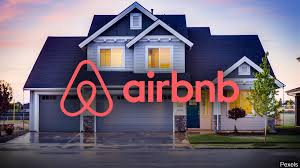

**Table of contents**

1.   Importing Required Libraries
2.   Acquaring and Loading Data
3.   Data Cleaning
  *   Dealing with missing values
  *   Removing redundant variables
  *   Replacing all the missing values
  *   Dropping duplicates
  *   Drop Columns with Missing Values
  *   Remove the NaN values
4.  Data Preprocessing 
5.  Exploring and Visualizing Data :
  *   Get Correlation between different variables
  *   Plot all Neighbourhood Group
  *   Neighbourhood
  *   Relation between neighbourgroup and Availability of Room
  *   Neighbourhood group Mapping
  *   Neighbourhood Mapping
  *   Room Type
  *   Availabity of roooms








## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing Required Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Airbnb NYC 2019.csv")

In [4]:
df.shape


(48895, 16)

In [5]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Removing the Duplicates if any

df.duplicated().sum()
df.drop_duplicates(inplace=True)



In [7]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

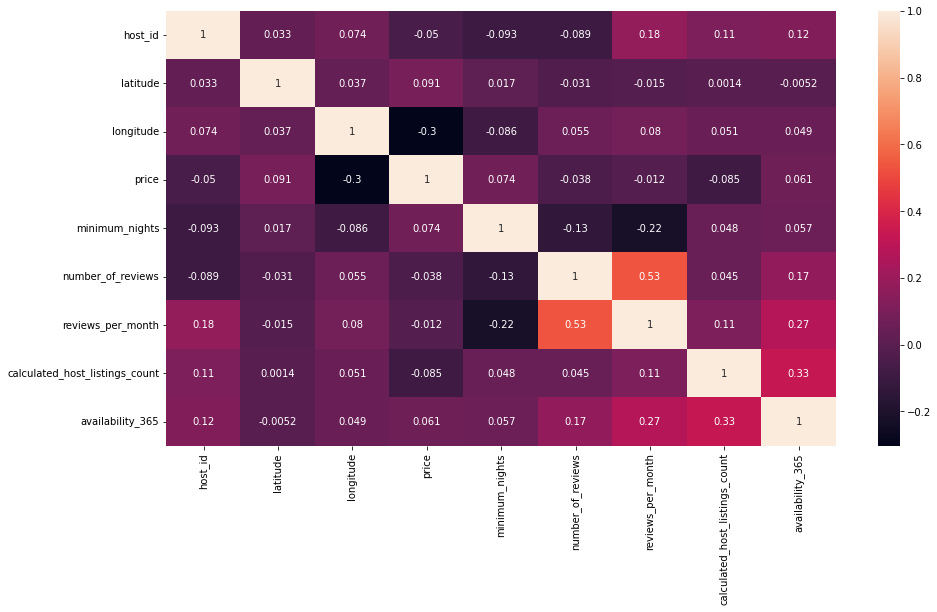

In [9]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')


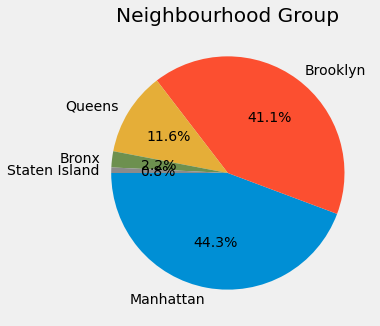

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
neighbourhood_group_count=df.neighbourhood_group.value_counts();
print(neighbourhood_group_count)
neighbourhood_group_label=df.neighbourhood_group.value_counts().index
print(neighbourhood_group_label)
pie_chart = plt.pie(neighbourhood_group_count, labels=neighbourhood_group_label,autopct='%1.1f%%', startangle=180)
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


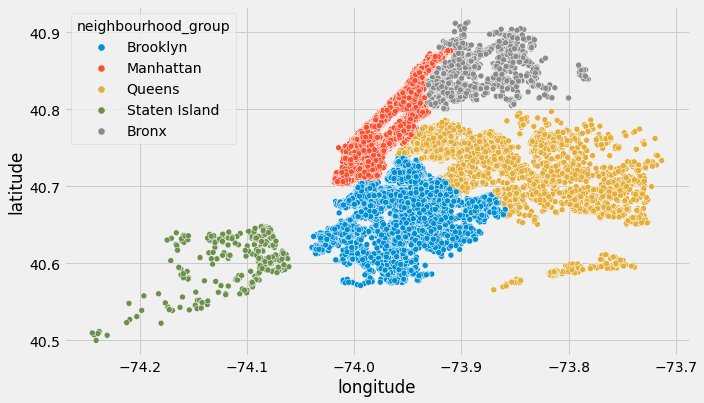

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


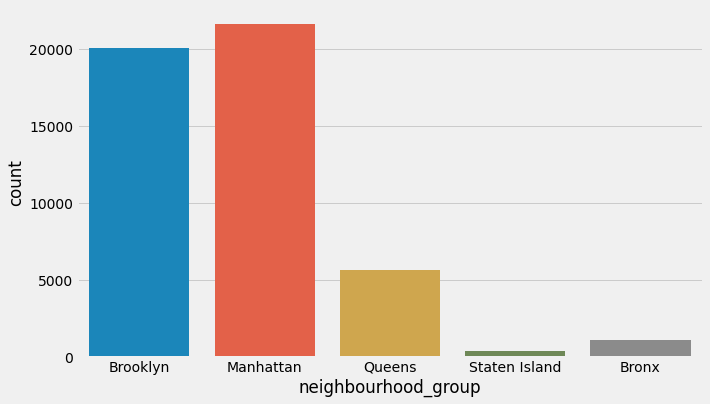

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df.neighbourhood_group)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


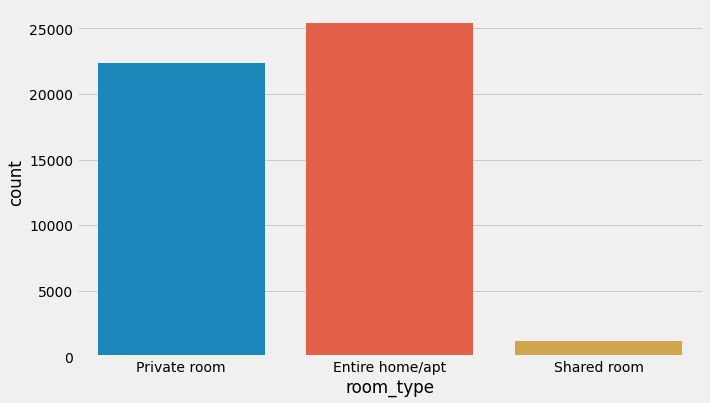

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df.room_type)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


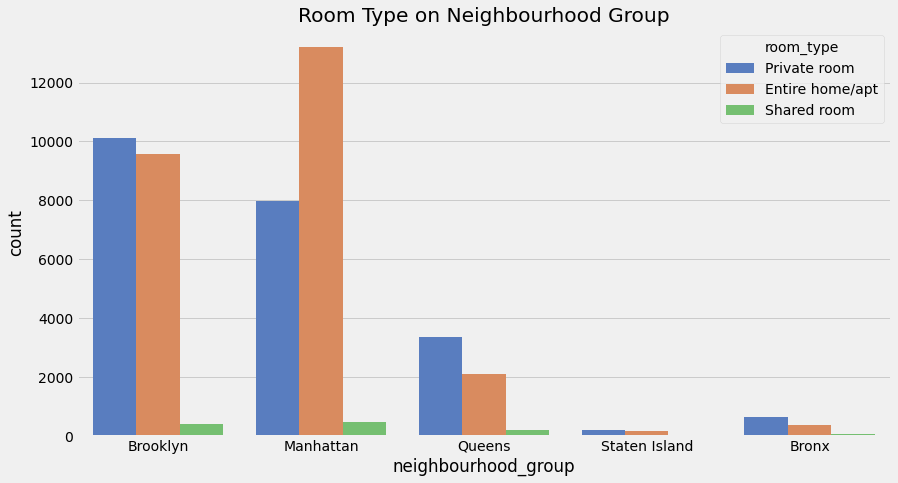

In [14]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()